In [32]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import requests 
import time 
df=pd.read_csv("Levels_Fyi_Salary_Data.csv", delimiter=",")
df.info()
df.head(60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.50,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.00,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.00,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.00,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.00,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
5,6/21/2017 17:27:47,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.50,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
6,6/22/2017 12:37:51,Microsoft,65,Software Engineering Manager,300000,"Redmond, WA",15.0,11.00,NaN,180000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
7,6/22/2017 13:55:26,Microsoft,62,Software Engineer,156000,"Seattle, WA",4.0,4.00,NaN,135000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
8,6/22/2017 23:08:16,Microsoft,59,Software Engineer,120000,"Redmond, WA",3.0,1.00,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
9,6/26/2017 21:25:45,Microsoft,63,Software Engineer,201000,"Seattle, WA",12.0,6.00,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
# take the location column and seperate state and city and index them, take min/max of base salary/totalyearlycompensation 

In [ ]:
#take base salary/totalyearlycompensation 

In [ ]:
#group by company and min/ max yearly compensation

In [ ]:
#Education compared to salary/totalyearlycompensation 

10000
4980000
0.0
69.0


<IPython.core.display.Javascript object>


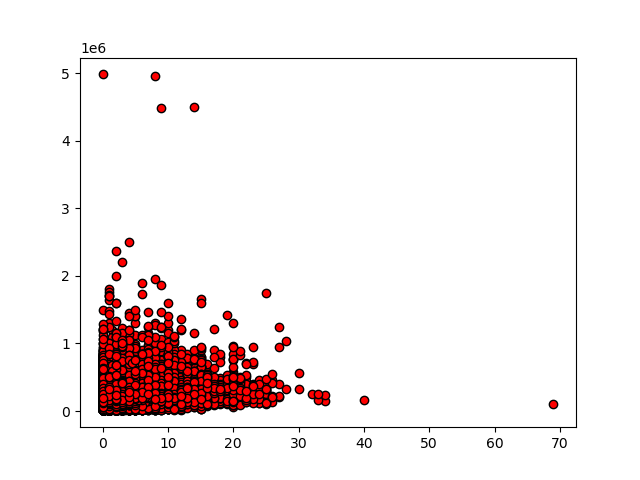

In [48]:
#years of experience/ years at company and comparison to yearly compensation
df_exp = pd.DataFrame(df,columns=["yearsofexperience","yearsatcompany","basesalary","stockgrantvalue","bonus","totalyearlycompensation"])
print(df_exp["totalyearlycompensation"].min())
print(df_exp["totalyearlycompensation"].max())
print(df_exp["yearsatcompany"].min())
print(df_exp["yearsatcompany"].max())
yearlycomp=df_exp["totalyearlycompensation"]
industryyears=df_exp["yearsofexperience"]
companyyears=df_exp["yearsatcompany"]
df_exp.head()
plt.scatter(companyyears,yearlycomp,marker="o", facecolors="red", edgecolors="black")
plt.scatter(industryyears,yearlycomp,marker="o", facecolors="red", edgecolors="black")
#Find and remove the outliers of both years and pay (Maybe top 100?)
#Check if other columns are usable and, if so, remove the zeroes from them

In [47]:
plt.scatter(industryyears,yearlycomp,marker="o", facecolors="red", edgecolors="black")

In [ ]:
#male/ female convert to usable data and compare to yearly compensation